In [ ]:
#https://www.kaggle.com/datasets/abiodunonadeji/united-state-superstore-sales

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Disciplina: Tópicos em Inteligência Computacional

Instituto Federal do Norte de Minas Gerais Campus Montes Claros

Curso: Ciência da Computação

Professora: Luciana Balieiro Cosme

Equipe: Fernanda Pimenta, Filipi Maciel, Thiago Evangelista e Welington Junio

**Base de dados**

O banco de dados permite que você entenda melhor o seu negócio e otimize-o com base na análise de dados. Esse conjunto de dados pode ser usado para criar uma ótima visualização e análise de dados com base em clientes, vendas, lucros, produtos, categorias e até análises de séries temporais.

**Metadados:**

**Row ID:** ​​ID exclusivo da linha;

**Order ID:** ID exclusivo do cliente;

**Order Date:** Data do pedido do produto da loja;

**Ship Date:** Data em que o produto foi enviado;

**Ship Mode:** Modo de envio do produto adquirido pelo cliente;

**Customer ID:** Cada ID exclusivo do cliente;

**Customer Name:** Nome do cliente que encomenda um produto;

**Segment:** Segmento do cliente;

**Country:** País de residência do cliente;

**City:** - Cidade de residência do cliente;

**State:** Estado de residência do cliente;

**Postal Code:** Código postal do cliente;

**Region:** Região do país onde o cliente reside;

**Product ID:** Identificação exclusiva do produto;

**Category:** Categoria do produto na loja;

**Sub-Category:** Subcategoria de produto na loja;

**Product Name:** Nome de cada produto na loja;

**Sales:** Vendas do produto;

**Quantity:** Quantidade de produto vendidos;

**Discount:** Desconto concedido ao cliente;

**Profit:** Lucro/Prejuízo incorrido.

In [ ]:
#módulos importantes
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from google.colab import drive
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [ ]:
#necessário localizar o caminho do arquivo. neste caso o arquivo ds_salary.csv está na raiz
url = 'https://raw.githubusercontent.com/ThigasSantos/BaseSuperStore/main/sales.csv'
df  = pd.read_csv(url)

df.head()

,OrderID,OrderDate,OrderYear,Order Quarter,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,...,Postal Code,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2018-152156,08/11/2018,2018,3,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2018-138688,12/06/2018,2018,4,16/06/2018,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2017-108966,11/10/2017,2017,4,18/10/2017,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.shape
df.describe()

,OrderYear,Order Quarter,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2017.722233,2.694617,55245.233297,229.858001,3.789574,0.156203,28.656896
std,1.123555,1.107635,32038.715955,623.245101,2.225110,0.206452,234.260108
min,2016.000000,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2017.000000,2.000000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2018.000000,3.000000,57103.000000,54.490000,3.000000,0.200000,8.666500
75%,2019.000000,4.000000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2019.000000,4.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df.describe(include="object")

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,Region,ProductID,Category,Sub-Category,ProductName
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1236,1334,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2019-100111,05/09/2018,16/12/2017,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [ ]:
from tabulate import tabulate

pd.options.display.max_columns = None
pd.options.display.width = None

pdtabulate=lambda df:tabulate(df,headers='keys',tablefmt='psql')
print(pdtabulate(df.head(100)))

+----+----------------+-------------+-------------+-----------------+------------+----------------+--------------+--------------------+-------------+---------------+-----------------+----------------+---------------+----------+-----------------+-----------------+----------------+----------------------------------------------------------------------------------------------------+----------+------------+------------+------------+
|    | OrderID        | OrderDate   |   OrderYear |   Order Quarter | ShipDate   | ShipMode       | CustomerID   | CustomerName       | Segment     | Country       | City            | State          |   Postal Code | Region   | ProductID       | Category        | Sub-Category   | ProductName                                                                                        |    Sales |   Quantity |   Discount |     Profit |
|----+----------------+-------------+-------------+-----------------+------------+----------------+--------------+--------------------+-

In [ ]:
df_ordenado = df.sort_values(by='Profit')
df_ordenado

,OrderID,OrderDate,OrderYear,Order Quarter,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,Postal Code,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
7772,CA-2018-108196,25/11/2018,2018,4,02/12/2018,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130.0,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780
683,US-2019-168116,04/11/2019,2019,2,04/11/2019,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
9774,CA-2016-169019,26/07/2016,2016,3,30/07/2016,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207.0,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
3011,CA-2019-134845,17/04/2019,2019,2,23/04/2019,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,Colorado,80027.0,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.9800
4991,US-2019-122714,07/12/2019,2019,3,13/12/2019,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,Illinois,60653.0,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,CA-2016-116904,23/09/2016,2016,3,28/09/2016,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,Minnesota,55407.0,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,9449.950,5,0.0,4630.4755
9039,CA-2018-117121,17/12/2018,2018,4,21/12/2018,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,Michigan,48205.0,Central,OFF-BI-10000545,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,9892.740,13,0.0,4946.3700
4190,CA-2019-166709,17/11/2019,2019,4,22/11/2019,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
8153,CA-2019-140151,23/03/2019,2019,1,25/03/2019,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115.0,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808


In [ ]:
df['TipoProfit'] = pd.cut(df.Profit, bins=[-67000000,0,1.728750,8.666500,29.364000,8400], right=True,labels=False)

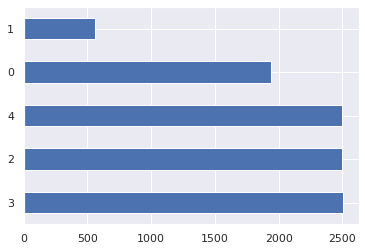

In [ ]:
pd.cut(df.Profit, bins=[-67000000,0,1.728750,8.666500,29.364000,8400], right=True,labels=False).value_counts().plot(kind='barh') 

Classificamos nossa variável de profit em quatro categorias, sendo:



*   0 = Prejuízo
*   1 = Lucro baixo (até 1,8 milhões)
*   2 = Lucro médio (até 8 milhões)
*   3 = Lucro alto (até 29 milhões)
*   4 = Lucro muito alto (acima de 29 milhões)

Esses valores condizem com a divisão descrita no `describe()`, referente aos valores de 25%, 50% e 75%, de modo que abaixo de 25% seria o valor 0, prejuízo, e acima de 75% seria o valor 4, lucro muito alto.

Com uma classificação, será possível visualizar de forma mais clara através dos intervalos definidos.









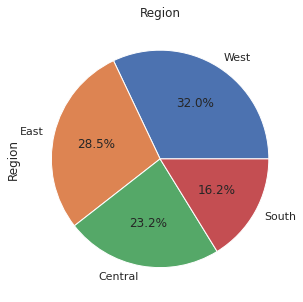

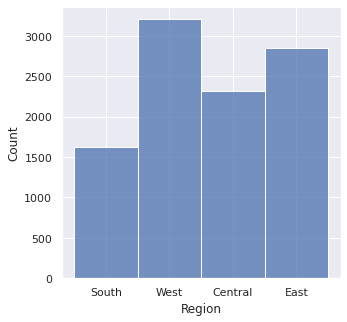

In [ ]:
plt.figure(1, figsize=(5,5))
plt.title("Region")
df['Region'].value_counts().plot.pie(autopct="%1.1f%%")

plt.figure(2, figsize=(5,5))
sns.histplot(df, x='Region');

Nos gráficos acima fica bem nítido o destaque das regiões da costa leste e oeste, local de cidades com grandes nomes como Nova Iorque, Los Angeles, Filadélfia, São Francisco, entre outros. 

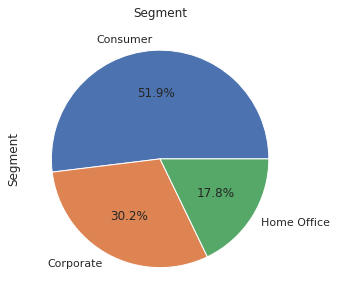

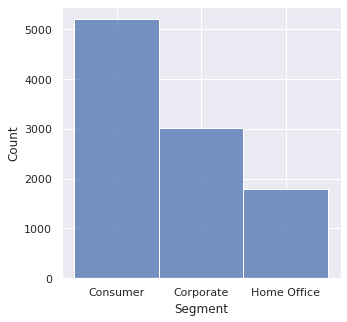

In [ ]:
plt.figure(1, figsize=(5,5))
plt.title("Segment")
df['Segment'].value_counts().plot.pie(autopct="%1.1f%%")

plt.figure(2, figsize=(5,5))
sns.histplot(df, x='Segment');

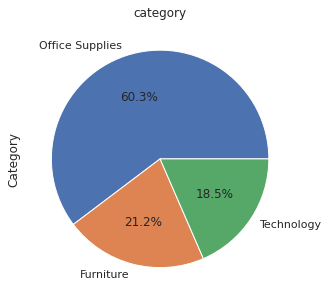

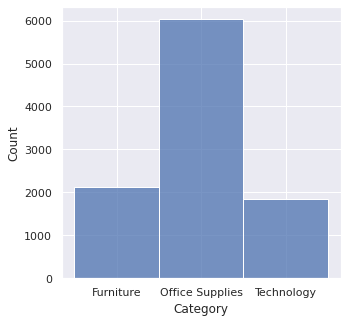

In [ ]:
plt.figure(1, figsize=(5,5))
plt.title("category")
df['Category'].value_counts().plot.pie(autopct="%1.1f%%")

plt.figure(2, figsize=(5,5))
sns.histplot(df, x='Category');

In [ ]:
numerical_float64 = (df.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['Postal Code', 'Sales', 'Discount', 'Profit']


In [ ]:
def bar_plot(variable):
    # get feature
    var = df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))
    
categorical = (df.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID', 'CustomerName', 'Segment', 'Country', 'City', 'State', 'Region', 'ProductID', 'Category', 'Sub-Category', 'ProductName']


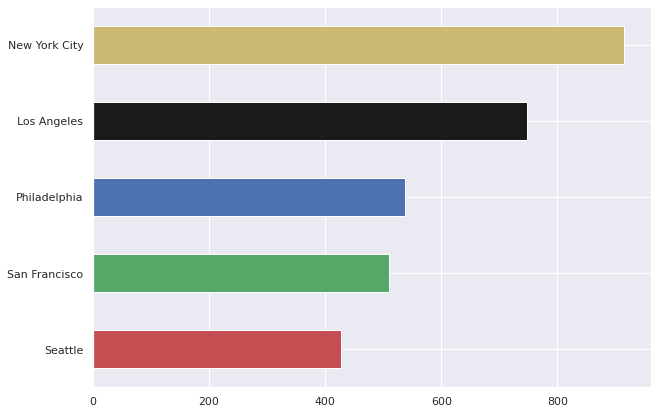

In [ ]:
df['City'].value_counts().head()

plt.figure(figsize = (10,7))

df.City.value_counts().head().sort_values().plot(kind = 'barh', color = list('rgbkymc'))

No gráfico acima temos a relação do lucro por cidade. Comparando com o gráfico por região vemos que a correlação bate, pois Nova York e Philadelphia se encontram na costa Leste, que no gráfico de região representa 28,5%, sendo a segunda região com maior lucro. A primeira fica com a costa Oeste, tendo Seattle, San Francisco e Los Angeles, representando 32% da região.



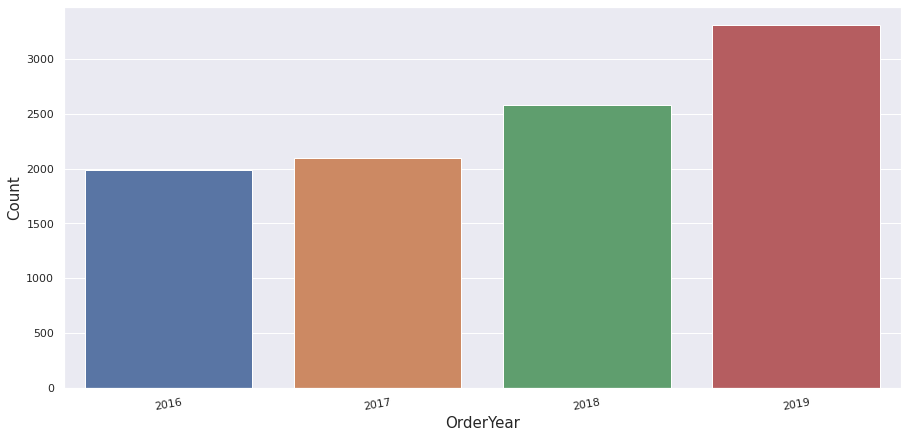

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot('OrderYear', data=df)
plt.xlabel('OrderYear', fontsize=(15))
plt.ylabel('Count', fontsize=(15))
plt.xticks(rotation=10)
plt.show()

In [ ]:
df.nunique()

OrderID          5009
OrderDate        1236
OrderYear           4
Order Quarter       4
ShipDate         1334
ShipMode            4
CustomerID        793
CustomerName      793
Segment             3
Country             1
City              531
State              49
Postal Code       630
Region              4
ProductID        1862
Category            3
Sub-Category       17
ProductName      1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
TipoProfit          5
dtype: int64

In [ ]:
plot_q4 = df.groupby(['OrderYear']).sum().sort_values(['OrderYear'],ascending=True)['Sales']

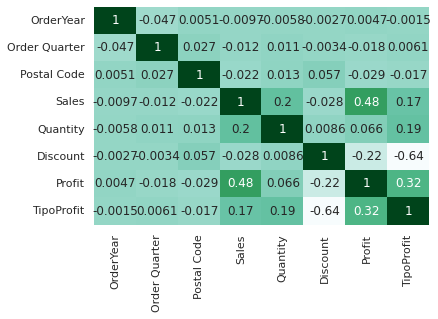

In [ ]:
sns.heatmap(df.corr(),cbar=False,cmap='BuGn',annot=True)

A tabela de correlação apresenta algumas informações básicas, por exemplo, a boa correlação entre lucro e vendas, o que faz sentido pois ambas estão diretamente relacionadas. A baixa correlação entre desconto e o tipo de lucro que definimos, e também com o lucro, pois o desconto é justamente uma redução no mesmo. A única correlação acima da média é quantidade com vendas, o que também faz sentido pois quanto maior meu volume de vendas, maior será meu lucro. O restante possui uma correlação em torno de 0.

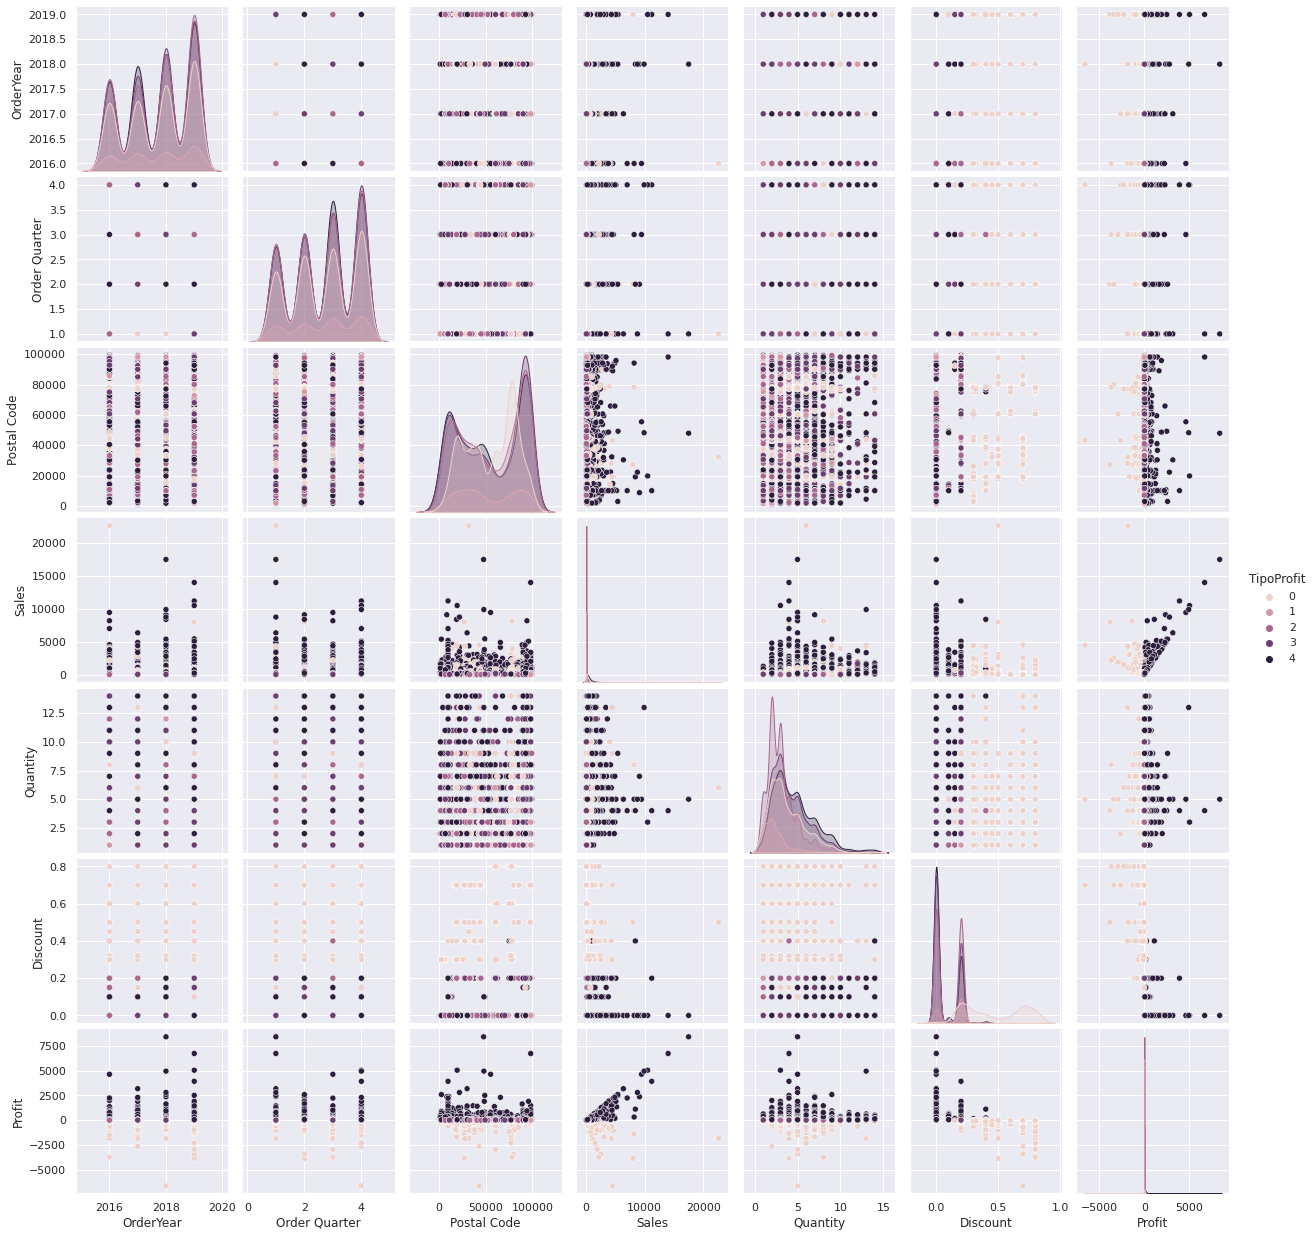

In [ ]:
sns.pairplot(df,hue='TipoProfit')

In [ ]:
newDF = df[['OrderYear','ShipDate','ShipMode','City','State','Region','Category','Sub-Category','Segment','ProductName','Quantity','Sales','Discount','TipoProfit']]
newDF.head()

,OrderYear,ShipDate,ShipMode,City,State,Region,Category,Sub-Category,Segment,ProductName,Quantity,Sales,Discount,TipoProfit
0,2018,11/11/2018,Second Class,Henderson,Kentucky,South,Furniture,Bookcases,Consumer,Bush Somerset Collection Bookcase,2,261.9600,0.00,4
1,2018,11/11/2018,Second Class,Henderson,Kentucky,South,Furniture,Chairs,Consumer,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,731.9400,0.00,4
2,2018,16/06/2018,Second Class,Los Angeles,California,West,Office Supplies,Labels,Corporate,Self-Adhesive Address Labels for Typewriters b...,2,14.6200,0.00,2
3,2017,18/10/2017,Standard Class,Fort Lauderdale,Florida,South,Furniture,Tables,Consumer,Bretford CR4500 Series Slim Rectangular Table,5,957.5775,0.45,0
4,2017,18/10/2017,Standard Class,Fort Lauderdale,Florida,South,Office Supplies,Storage,Consumer,Eldon Fold 'N Roll Cart System,2,22.3680,0.20,2


In [ ]:
newDF = pd.get_dummies(newDF, columns = ['Category'])
newDF = pd.get_dummies(newDF, columns = ['Segment'])
newDF = pd.get_dummies(newDF, columns = ['Region'])
newDF = pd.get_dummies(newDF, columns = ['ShipMode'])


In [ ]:
newDF.nunique()

OrderYear                      4
ShipDate                    1334
City                         531
State                         49
Sub-Category                  17
ProductName                 1850
Quantity                      14
Sales                       5825
Discount                      12
TipoProfit                     5
Category_Furniture             2
Category_Office Supplies       2
Category_Technology            2
Segment_Consumer               2
Segment_Corporate              2
Segment_Home Office            2
Region_Central                 2
Region_East                    2
Region_South                   2
Region_West                    2
ShipMode_First Class           2
ShipMode_Same Day              2
ShipMode_Second Class          2
ShipMode_Standard Class        2
dtype: int64

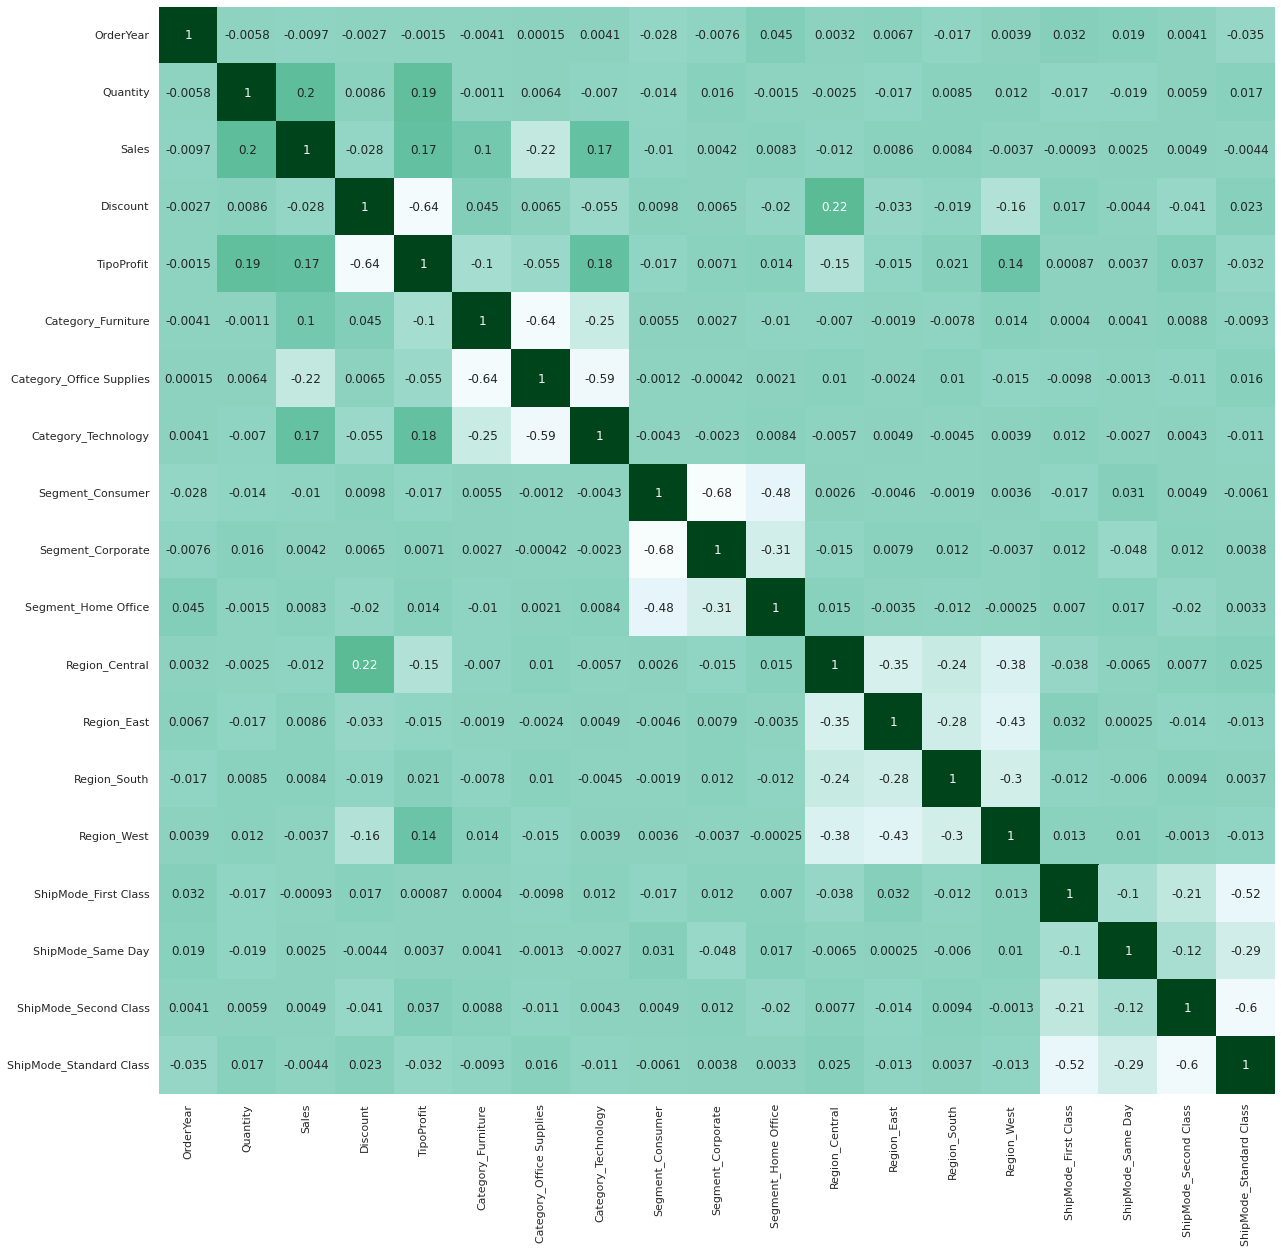

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(newDF.corr(),cbar=False,cmap='BuGn',annot=True)

Agora vamos analisar o resultado de algumas predições usando as ferramentas que já conhecemos. A predição é sobre qual tipo de profit definido a empresa se enquadra.


**KNN TODAS AS CARACTERISTICAS**

In [ ]:
X = newDF[['Quantity','Sales','Discount','Category_Furniture','Category_Office Supplies','Category_Technology','Segment_Consumer','Segment_Corporate','Segment_Home Office','Region_Central','Region_East','Region_South','Region_West','ShipMode_First Class','ShipMode_Same Day','ShipMode_Second Class','ShipMode_Standard Class']]
y = newDF['TipoProfit'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

y_pred = knn.predict(X_test)
acuracia =  knn.score(X_test, y_test)

print(acuracia)

0.64032016008004


In [ ]:
def neighbors_(n):
  X = newDF[['Quantity','Sales','Discount','Category_Furniture','Category_Office Supplies','Category_Technology','Segment_Consumer','Segment_Corporate','Segment_Home Office','Region_Central','Region_East','Region_South','Region_West','ShipMode_First Class','ShipMode_Same Day','ShipMode_Second Class','ShipMode_Standard Class']]
  y = newDF['TipoProfit'].values

  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

  melhor = 0;

  for i in range (n):
    knn = KNeighborsClassifier(n_neighbors=i+1)
    knn.fit(X_train,y_train)

    knn.score(X_test,y_test)

    y_pred = knn.predict(X_test)
    acuracia =  knn.score(X_test, y_test)

    print("Qtd Vizinhos = ", i+1, " --> ", acuracia)
    
    if(acuracia > melhor):
      melhor = acuracia
      qtd_vizinhos = i+1

  print("\nMelhor resultado = ", melhor, " com ", qtd_vizinhos, " vizinhos." )


In [ ]:
neighbors_(80)

Qtd Vizinhos =  1  -->  0.6123061530765382
Qtd Vizinhos =  2  -->  0.542271135567784
Qtd Vizinhos =  3  -->  0.6283141570785392
Qtd Vizinhos =  4  -->  0.6103051525762881
Qtd Vizinhos =  5  -->  0.6218109054527263
Qtd Vizinhos =  6  -->  0.6183091545772886
Qtd Vizinhos =  7  -->  0.6308154077038519
Qtd Vizinhos =  8  -->  0.6308154077038519
Qtd Vizinhos =  9  -->  0.64032016008004
Qtd Vizinhos =  10  -->  0.6358179089544772
Qtd Vizinhos =  11  -->  0.6358179089544772
Qtd Vizinhos =  12  -->  0.6408204102051025
Qtd Vizinhos =  13  -->  0.6423211605802901
Qtd Vizinhos =  14  -->  0.6438219109554777
Qtd Vizinhos =  15  -->  0.6428214107053527
Qtd Vizinhos =  16  -->  0.6448224112056028
Qtd Vizinhos =  17  -->  0.6438219109554777
Qtd Vizinhos =  18  -->  0.6448224112056028
Qtd Vizinhos =  19  -->  0.6423211605802901
Qtd Vizinhos =  20  -->  0.6368184092046023
Qtd Vizinhos =  21  -->  0.6378189094547274
Qtd Vizinhos =  22  -->  0.6363181590795398
Qtd Vizinhos =  23  -->  0.6373186593296648


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.36      0.43       387
           1       0.58      0.41      0.48       113
           2       0.70      0.70      0.70       500
           3       0.61      0.69      0.65       500
           4       0.66      0.80      0.72       499

    accuracy                           0.64      1999
   macro avg       0.62      0.59      0.60      1999
weighted avg       0.63      0.64      0.63      1999



Analisando o resultado do KNN, o resultado fica em 0.64. Foram usadas todas as características disponíveis.

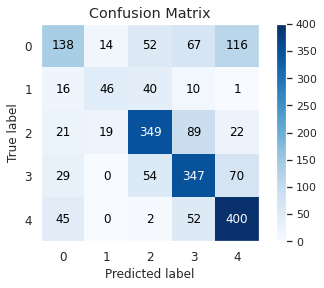

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

A matriz de confusão do KNN...

In [ ]:
print("test --> ", y_test.shape)
print("pred -->", y_pred.shape)

test -->  (1999,)
pred --> (1999,)


**RFE**

In [ ]:
model = LogisticRegression(max_iter=20000)
from sklearn.feature_selection import RFE
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X,y)

cols = fit.get_support(indices=True)
X.iloc[:,cols]

,Discount,Category_Furniture,Category_Office Supplies,Category_Technology
0,0.00,1,0,0
1,0.00,1,0,0
2,0.00,0,1,0
3,0.45,1,0,0
4,0.20,0,1,0
...,...,...,...,...
9989,0.20,1,0,0
9990,0.00,1,0,0
9991,0.20,0,0,1
9992,0.00,0,1,0


In [ ]:
X = newDF[['Discount','Category_Furniture','Category_Office Supplies','Category_Technology']]
y = newDF['TipoProfit'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

y_pred = knn.predict(X_test)
acuracia =  knn.score(X_test, y_test)

print(acuracia)
print(y_test.shape, y_pred.shape)

0.4462231115557779
(1999,) (1999,)


In [ ]:
print(classification_report(y_test, y_pred))
print(y_test.shape, y_pred.shape)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       387
           1       0.00      0.00      0.00       113
           2       0.36      0.75      0.49       500
           3       0.27      0.20      0.23       500
           4       0.60      0.22      0.32       499

    accuracy                           0.45      1999
   macro avg       0.39      0.39      0.36      1999
weighted avg       0.45      0.45      0.41      1999

(1999,) (1999,)


Para o RFE foi usado 


(1999,) (1999,)


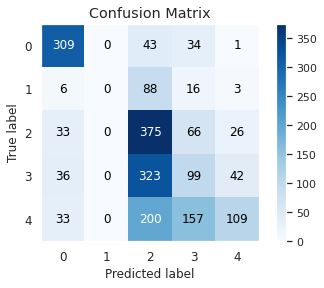

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
print(y_test.shape, y_pred.shape)

In [ ]:
print("test --> ", y_test.shape)
print("pred -->", y_pred.shape)

test -->  (1999,)
pred --> (1999,)


**F Classify**

In [ ]:
X = newDF[['Quantity','Sales','Discount','Category_Furniture','Category_Office Supplies','Category_Technology','Segment_Consumer','Segment_Corporate','Segment_Home Office','Region_Central','Region_East','Region_South','Region_West','ShipMode_First Class','ShipMode_Same Day','ShipMode_Second Class','ShipMode_Standard Class']]
y = newDF['TipoProfit'].values

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

f_classif = SelectKBest(score_func=f_classif, k=4)
fit= f_classif.fit(X,y)
features= fit.transform

cols = fit.get_support(indices=True)
X.iloc[:,cols]

,Quantity,Sales,Discount,Category_Office Supplies
0,2,261.9600,0.00,0
1,3,731.9400,0.00,0
2,2,14.6200,0.00,1
3,5,957.5775,0.45,0
4,2,22.3680,0.20,1
...,...,...,...,...
9989,3,25.2480,0.20,0
9990,2,91.9600,0.00,0
9991,2,258.5760,0.20,0
9992,4,29.6000,0.00,1


In [ ]:
X = newDF[['Discount','Sales','Category_Office Supplies','Quantity']]
y = newDF['TipoProfit'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

y_pred = knn.predict(X_test)
acuracia =  knn.score(X_test, y_test)

print(acuracia)
print(y_test.shape, y_pred.shape)

0.6493246623311656
(1999,) (1999,)


In [ ]:
print(classification_report(y_test, y_pred))
print(y_test.shape, y_pred.shape)

              precision    recall  f1-score   support

           0       0.58      0.39      0.47       387
           1       0.71      0.47      0.56       113
           2       0.69      0.71      0.70       500
           3       0.64      0.69      0.66       500
           4       0.65      0.79      0.71       499

    accuracy                           0.65      1999
   macro avg       0.65      0.61      0.62      1999
weighted avg       0.65      0.65      0.64      1999

(1999,) (1999,)


(1999,) (1999,)


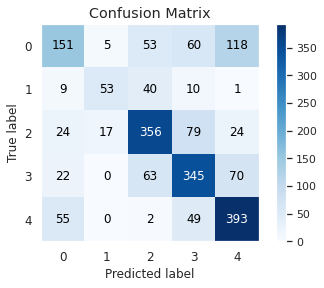

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
print(y_test.shape, y_pred.shape)

In [ ]:
print("test --> ", y_test.shape)
print("pred -->", y_pred.shape)

test -->  (1999,)
pred --> (1999,)


**PCA**

In [ ]:
X = np.array(np.array(newDF[['Quantity','Sales','Discount','Category_Furniture','Category_Office Supplies','Category_Technology','Segment_Consumer','Segment_Corporate','Segment_Home Office','Region_Central','Region_East','Region_South','Region_West','ShipMode_First Class','ShipMode_Same Day','ShipMode_Second Class','ShipMode_Standard Class']]))
S = np.cov(np.transpose(X))

In [ ]:
pca = PCA(n_components=2)
pca.fit(S)

PCA(n_components=2)

In [ ]:
np.round(pca.explained_variance_ratio_, 2)

array([1., 0.])

In [ ]:
pca.explained_variance_ratio_.cumsum()

array([1., 1.])

In [ ]:
COL_PCA = []
for p in range(len(pca.explained_variance_ratio_)):
  COL_PCA.append('PCA_'+str(p))

df_pca = pd.DataFrame(pca.transform(X), columns=COL_PCA)
df_pca['TARGET'] = df['TipoProfit']
df_pca.head()

,PCA_0,PCA_1,TARGET
0,-22603.297404,1.510381,4
1,-22133.316819,2.175259,4
2,-22850.637569,1.712197,2
3,-21907.677961,4.017858,0
4,-22842.889583,1.701689,2


In [ ]:
print(y_test.shape, y_pred.shape)

(1999,) (1999,)


In [ ]:

X = df_pca[['PCA_0','PCA_1']]
y = df_pca['TARGET']
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.20, random_state=1)

classifier1 = KNeighborsClassifier(n_neighbors = 7)
classifier1.fit(X_treinamento, y_treinamento)
y_pred = classifier1.predict(X_teste)
acuracia =  classifier1.score(X_teste, y_teste)

print(classification_report(y_teste, y_pred))
print(y_teste.shape, y_pred.shape)

              precision    recall  f1-score   support

           0       0.42      0.34      0.37       385
           1       0.51      0.40      0.45        95
           2       0.73      0.73      0.73       542
           3       0.61      0.70      0.65       476
           4       0.69      0.73      0.71       501

    accuracy                           0.63      1999
   macro avg       0.59      0.58      0.58      1999
weighted avg       0.62      0.63      0.62      1999

(1999,) (1999,)


In [ ]:
print("test --> ", y_teste.shape)
print("pred -->", y_pred.shape)

test -->  (1999,)
pred --> (1999,)


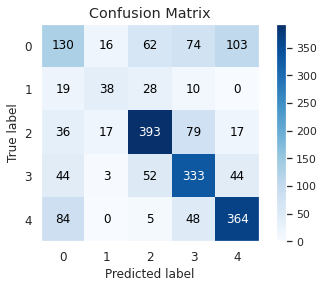

In [ ]:
skplt.metrics.plot_confusion_matrix(y_teste,y_pred)

**ARVORE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X = newDF[['Quantity','Sales','Discount','Category_Furniture','Category_Office Supplies','Category_Technology','Segment_Consumer','Segment_Corporate','Segment_Home Office','Region_Central','Region_East','Region_South','Region_West','ShipMode_First Class','ShipMode_Same Day','ShipMode_Second Class','ShipMode_Standard Class']]
y = newDF['TipoProfit']
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.20,random_state=0)

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_Train, y_Train)

arvore_sales= DecisionTreeClassifier(max_depth=10,min_samples_split=10, 
          min_samples_leaf=10,max_leaf_nodes=10, random_state=0)
arvore_sales.fit(X_res, y_res)

y_pred = arvore_sales.predict(X_Test)
print("Accuracy:",metrics.accuracy_score(y_Test, y_pred))

Accuracy: 0.7363681840920461


In [ ]:
print(classification_report(y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73       384
           1       0.69      0.51      0.59       109
           2       0.89      0.67      0.77       523
           3       0.67      0.75      0.71       490
           4       0.80      0.76      0.78       493

    accuracy                           0.74      1999
   macro avg       0.74      0.71      0.71      1999
weighted avg       0.75      0.74      0.74      1999



[Text(0.4642857142857143, 0.9166666666666666, 'Discount <= 0.25\ngini = 0.8\nsamples = 2270\nvalue = [454, 454, 454, 454, 454]'),
 Text(0.39285714285714285, 0.75, 'Sales <= 23.995\ngini = 0.781\nsamples = 1961\nvalue = [153, 454, 452, 452, 450]'),
 Text(0.14285714285714285, 0.5833333333333334, 'Sales <= 5.982\ngini = 0.565\nsamples = 810\nvalue = [15, 401, 350, 44, 0]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.146\nsamples = 267\nvalue = [3, 246, 18, 0, 0]'),
 Text(0.21428571428571427, 0.4166666666666667, 'Discount <= 0.1\ngini = 0.538\nsamples = 543\nvalue = [12, 155, 332, 44, 0]'),
 Text(0.14285714285714285, 0.25, 'Sales <= 17.64\ngini = 0.429\nsamples = 264\nvalue = [0, 31, 193, 40, 0]'),
 Text(0.07142857142857142, 0.08333333333333333, 'gini = 0.251\nsamples = 185\nvalue = [0, 26, 158, 1, 0]'),
 Text(0.21428571428571427, 0.08333333333333333, 'gini = 0.556\nsamples = 79\nvalue = [0, 5, 35, 39, 0]'),
 Text(0.2857142857142857, 0.25, 'gini = 0.552\nsamples = 279\nvalue 

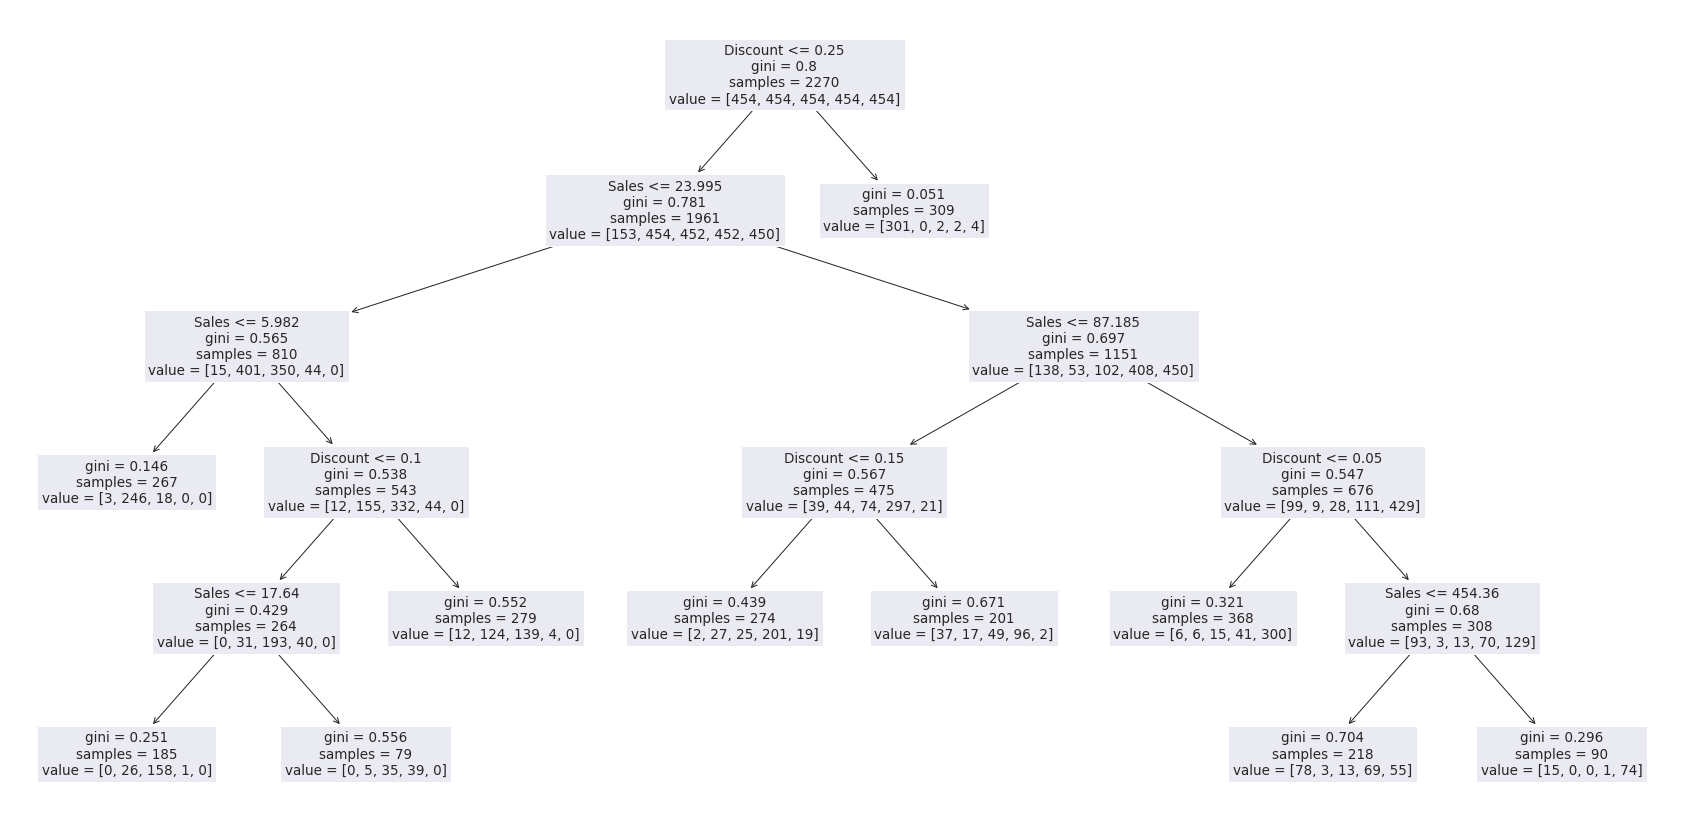

In [ ]:
from sklearn import tree
previsores =('Quantity','Sales','Discount','Category_Furniture','Category_Office Supplies','Category_Technology','Segment_Consumer','Segment_Corporate','Segment_Home Office','Region_Central','Region_East','Region_South','Region_West','ShipMode_First Class','ShipMode_Same Day','ShipMode_Second Class','ShipMode_Standard Class')
figura, eixos = plt.subplots(nrows=1,ncols=1,figsize=(30,15))
tree.plot_tree(arvore_sales, feature_names=previsores)

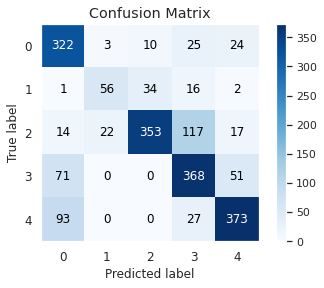

In [ ]:
skplt.metrics.plot_confusion_matrix(y_Test,y_pred)

**ARVORE SÓ COM DESCONTO E SALES**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X = newDF[['Sales','Discount']]
y = newDF['TipoProfit']
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.20,random_state=0)

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_Train, y_Train)

arvore_sales= DecisionTreeClassifier(max_depth=10,min_samples_split=10, 
          min_samples_leaf=10,max_leaf_nodes=10, random_state=0)
arvore_sales.fit(X_res, y_res)

y_pred = arvore_sales.predict(X_Test)
print("Accuracy:",metrics.accuracy_score(y_Test, y_pred))

Accuracy: 0.7363681840920461


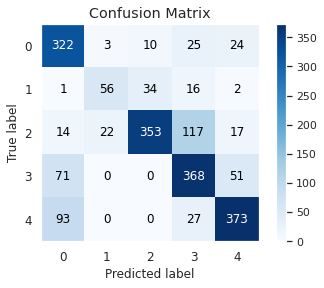

In [ ]:
skplt.metrics.plot_confusion_matrix(y_Test,y_pred)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf=RandomForestClassifier(n_estimators=1000)
clf.fit(X_res,y_res)

y_pred=clf.predict(X_Test)

print("Accuracy:",metrics.accuracy_score(y_Test, y_pred))

Accuracy: 0.6718359179589795


Árvore/Random forest classify gerou o melhor resultado.

In [ ]:
print(classification_report(y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       384
           1       0.33      0.68      0.44       109
           2       0.72      0.56      0.63       523
           3       0.65      0.62      0.63       490
           4       0.77      0.75      0.76       493

    accuracy                           0.67      1999
   macro avg       0.64      0.68      0.64      1999
weighted avg       0.69      0.67      0.68      1999



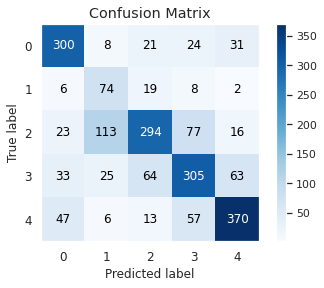

In [ ]:
skplt.metrics.plot_confusion_matrix(y_Test,y_pred)

In [ ]:
X = newDF[['Quantity','Sales','Discount','Category_Furniture','Category_Office Supplies','Category_Technology','Segment_Consumer','Segment_Corporate','Segment_Home Office','Region_Central','Region_East','Region_South','Region_West','ShipMode_First Class','ShipMode_Same Day','ShipMode_Second Class','ShipMode_Standard Class']]
y = newDF['TipoProfit']
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.20,random_state=0)

import statsmodels.api as sm
modelo = sm.MNLogit(y_Train, X_Train)
classifier1 = modelo.fit(method='newton')

Optimization terminated successfully.
         Current function value: nan
         Iterations 12


In [ ]:
print(classifier1.summary())

                          MNLogit Regression Results                          
Dep. Variable:             TipoProfit   No. Observations:                 7995
Model:                        MNLogit   Df Residuals:                     7939
Method:                           MLE   Df Model:                           52
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                     nan
Time:                        21:19:21   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -12156.
Covariance Type:            nonrobust   LLR p-value:                       nan
            TipoProfit=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Quantity                    -0.1579      0.052     -3.032      0.002      -0.260      -0.056
Sales                       -0.0990      0.006    -16.680      0.000      -0.111      -0.

In [ ]:
X = newDF[['Quantity','Sales','Discount']]
y = newDF['TipoProfit']
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.20,random_state=0)

import statsmodels.api as sm
modelo = sm.MNLogit(y_Train, X_Train)
classifier1 = modelo.fit(method='newton')

Optimization terminated successfully.
         Current function value: nan
         Iterations 12


In [ ]:
print(classifier1.summary())

                          MNLogit Regression Results                          
Dep. Variable:             TipoProfit   No. Observations:                 7995
Model:                        MNLogit   Df Residuals:                     7983
Method:                           MLE   Df Model:                            8
Date:                Sat, 10 Dec 2022   Pseudo R-squ.:                     nan
Time:                        21:19:22   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -12156.
Covariance Type:            nonrobust   LLR p-value:                       nan
TipoProfit=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Quantity         0.6570      0.037     17.898      0.000       0.585       0.729
Sales           -0.0557      0.004    -13.886      0.000      -0.064      -0.048
Discount        -6.7589      0.351    -19.26

In [ ]:
X = newDF[['Quantity','Sales','Discount']]
y = newDF['TipoProfit'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

y_pred = knn.predict(X_test)
acuracia =  knn.score(X_test, y_test)

print(acuracia)

0.6538269134567284


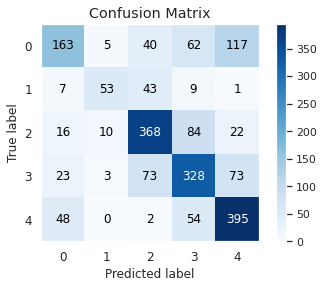

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

In [ ]:
import seaborn as sn
from sklearn import metrics

X = newDF[['Quantity','Sales','Discount']]
y = newDF['TipoProfit'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5867933966983492


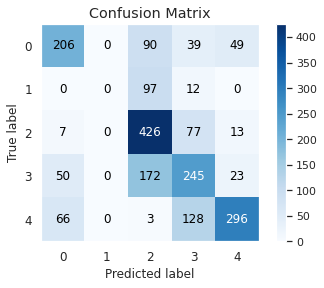

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

**NOVO TARGET**

In [ ]:
newDF['TipoProfitNovo'] = pd.cut(df.Profit, bins=[-67000000,1.728750,8.666500,29.364000,8400], right=True,labels=False)

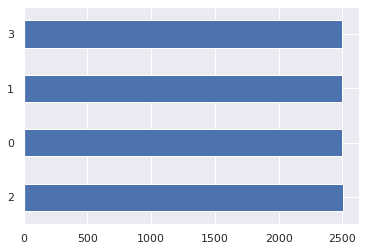

In [ ]:
pd.cut(df.Profit, bins=[-67000000,1.728750,8.666500,29.364000,8400], right=True,labels=False).value_counts().plot(kind='barh') 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X = newDF[['Sales','Discount']]
y = newDF['TipoProfitNovo']
X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.20,random_state=0)

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_Train, y_Train)

arvore_sales= DecisionTreeClassifier(max_depth=10,min_samples_split=10, 
          min_samples_leaf=10,max_leaf_nodes=10, random_state=0)
arvore_sales.fit(X_res, y_res)

y_pred = arvore_sales.predict(X_Test)
print("Accuracy:",metrics.accuracy_score(y_Test, y_pred))

Accuracy: 0.7453726863431716


In [ ]:
print(classification_report(y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.67      0.79       493
           1       0.79      0.73      0.76       523
           2       0.58      0.78      0.66       490
           3       0.78      0.79      0.79       493

    accuracy                           0.75      1999
   macro avg       0.77      0.75      0.75      1999
weighted avg       0.78      0.75      0.75      1999



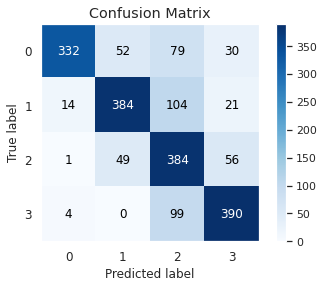

In [ ]:
skplt.metrics.plot_confusion_matrix(y_Test,y_pred)

**Validação Cruzada**

In [ ]:

X = newDF[['Quantity','Sales','Discount']]
y = newDF['TipoProfit']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)
# Cross-Validation models.

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# KFold settings.
kfold  = KFold(n_splits=10, shuffle=True) # shuffle=True, Shuffle (embaralhar) the data.

# Models instances.
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

# Applyes KFold to models.
logisticRegression_result = cross_val_score(LogisticRegression(), X, y, cv = kfold)

# Creates a dictionary to store Linear Models.
dic_models = {
  "Regrassão Logistica": logisticRegression_result,
  "Logistic Regression Mean": logisticRegression_result.mean(),
}

print("Regrassão Logistica: {0}\nLogistic Regression Mean : {1}".format(logisticRegression_result,logisticRegression_result.mean()))

Regrassão Logistica: [0.574      0.547      0.577      0.613      0.55355355 0.58158158
 0.58558559 0.57857858 0.56956957 0.57957958]
Logistic Regression Mean : 0.5759448448448449


**Balanceamento**

In [ ]:
X = newDF[['Sales','Discount']]
y = newDF['TipoProfit']

from imblearn.over_sampling import SMOTE 
smt = SMOTE()
X, y = smt.fit_resample(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.20,random_state=0)

from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_Train, y_Train)

arvore_sales= DecisionTreeClassifier(max_depth=10,min_samples_split=10, 
          min_samples_leaf=10,max_leaf_nodes=10, random_state=0)
arvore_sales.fit(X_res, y_res)

y_pred = arvore_sales.predict(X_Test)
print("Accuracy:",metrics.accuracy_score(y_Test, y_pred))

Accuracy: 0.7414221780208852


In [ ]:
print(classification_report(y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83       422
           1       0.93      0.62      0.74       407
           2       0.66      0.68      0.67       387
           3       0.55      0.87      0.68       394
           4       0.80      0.83      0.81       401

    accuracy                           0.74      2011
   macro avg       0.79      0.74      0.75      2011
weighted avg       0.79      0.74      0.75      2011



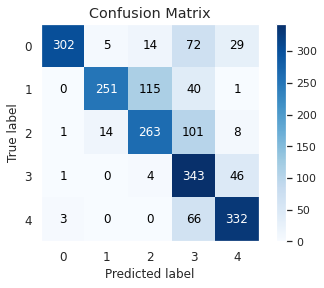

In [ ]:
skplt.metrics.plot_confusion_matrix(y_Test,y_pred)

**Agrupamento**

In [ ]:
agrupaDF = df[['OrderYear','ShipDate','ShipMode','City','State','Region','Category','Sub-Category','Segment','ProductName','Quantity','Sales','Discount','TipoProfit']]

In [ ]:
agrupaDF['ShipMode1'] = np.where((agrupaDF['ShipMode']=='First Class') | (agrupaDF['ShipMode']=='Second Class'), 1, 0)
agrupaDF['ShipMode2'] = np.where((agrupaDF['ShipMode']=='Standart Class') | (agrupaDF['ShipMode']=='Same Day'), 1, 0)

agrupaDF['Region1'] = np.where((agrupaDF['Region']=='Central') | (agrupaDF['Region']=='South'), 1, 0)
agrupaDF['Region2'] = np.where((agrupaDF['Region']=='West') | (agrupaDF['Region']=='East'), 1, 0)

agrupaDF = pd.get_dummies(agrupaDF, columns = ['Category'])
agrupaDF = pd.get_dummies(agrupaDF, columns = ['Segment'])

In [ ]:
agrupaDF.head()

,OrderYear,ShipDate,ShipMode,City,State,Region,Sub-Category,ProductName,Quantity,Sales,Discount,TipoProfit,ShipMode1,ShipMode2,Region1,Region2,Category_Furniture,Category_Office Supplies,Category_Technology,Segment_Consumer,Segment_Corporate,Segment_Home Office
0,2018,11/11/2018,Second Class,Henderson,Kentucky,South,Bookcases,Bush Somerset Collection Bookcase,2,261.9600,0.00,4,1,0,1,0,1,0,0,1,0,0
1,2018,11/11/2018,Second Class,Henderson,Kentucky,South,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",3,731.9400,0.00,4,1,0,1,0,1,0,0,1,0,0
2,2018,16/06/2018,Second Class,Los Angeles,California,West,Labels,Self-Adhesive Address Labels for Typewriters b...,2,14.6200,0.00,2,1,0,0,1,0,1,0,0,1,0
3,2017,18/10/2017,Standard Class,Fort Lauderdale,Florida,South,Tables,Bretford CR4500 Series Slim Rectangular Table,5,957.5775,0.45,0,0,0,1,0,1,0,0,1,0,0
4,2017,18/10/2017,Standard Class,Fort Lauderdale,Florida,South,Storage,Eldon Fold 'N Roll Cart System,2,22.3680,0.20,2,0,0,1,0,0,1,0,1,0,0


In [ ]:
X = agrupaDF[['Quantity','Sales','Discount','Category_Furniture','Category_Office Supplies','Category_Technology','Segment_Consumer','Segment_Corporate','Segment_Home Office','Region1','Region2','ShipMode1','ShipMode2']]
y = agrupaDF['TipoProfit'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

y_pred = knn.predict(X_test)
acuracia =  knn.score(X_test, y_test)

print(acuracia)

0.6503251625812907


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.36      0.44       387
           1       0.60      0.42      0.50       113
           2       0.71      0.72      0.71       500
           3       0.63      0.70      0.66       500
           4       0.66      0.81      0.72       499

    accuracy                           0.65      1999
   macro avg       0.63      0.60      0.61      1999
weighted avg       0.64      0.65      0.64      1999



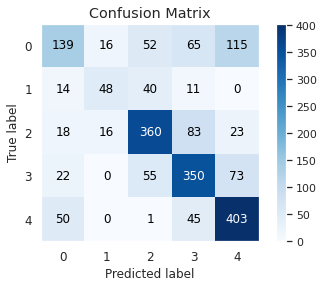

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)